In [234]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [235]:
df = pd.read_csv('./data/asian_paints.csv',header=0, index_col=0, parse_dates=True, squeeze=True).fillna(0).T.transform(pd.to_numeric, errors='coerce').sort_index()
# df

In [236]:
income = df.iloc[:, 0:13]
profit = df.iloc[:, 13:24]
liabilities = df.iloc[: ,24:39]
assets = df.iloc[: ,39:58]
cashflow = df.iloc[: ,58:66]
financial_ratios = df.iloc[: ,66:72]
profitability_ratios = df.iloc[: ,72:78]
growth_ratios = df.iloc[: ,78:83]
solvency_ratios = df.iloc[: ,83:87]
operating_efficiency_ratios = df.iloc[: ,87:93]
valuation_ratios = df.iloc[: ,93:101]
# valuation_ratios

In [237]:
ebitda_growth = 0.30
ev = (liabilities.loc[:,'Share Capital'] * valuation_ratios.loc[:,"Close Price (Rs)"]) + assets.loc[:,'Total Debt*'] - assets.loc[:,'Cash and Bank']
ev_by_ebitda = ev/income.loc[:, "Operating Profit"]
expected_ebitda = income.loc["TTM", "Operating Profit"] * (1 + ebitda_growth)
expected_ev = (ev_by_ebitda.loc["TTM"]*expected_ebitda) - assets.loc['TTM','Total Debt*']
ratio = ev.loc["TTM"] / expected_ev
ratio


0.7692307692307693

Under valued


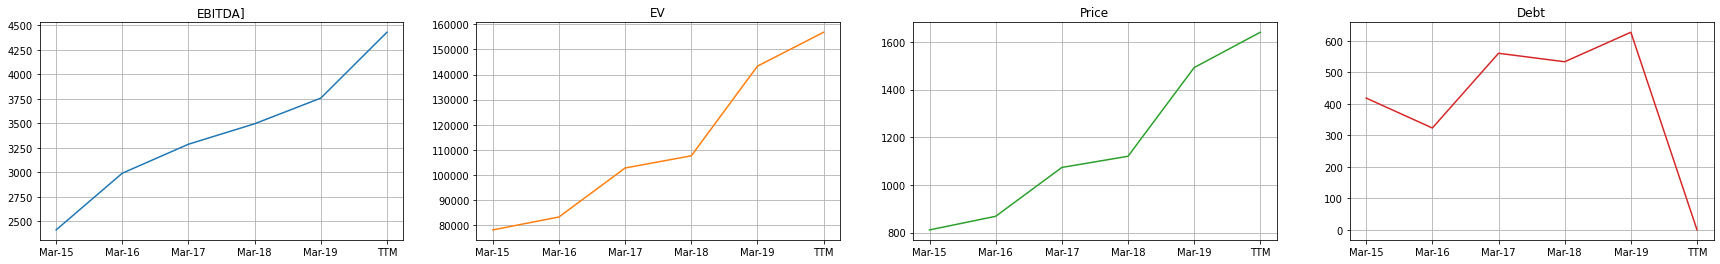

In [238]:
fig, axs = plt.subplots(1, 4)
fig.set_figwidth(30)
axs[0].plot(income.loc[:, "Operating Profit"])
axs[0].set_title('EBITDA]')
axs[0].grid()
axs[1].plot(ev, 'tab:orange')
axs[1].set_title('EV')
axs[1].grid()
axs[2].plot(valuation_ratios.loc[:, "Close Price (Rs)"], 'tab:green')
axs[2].set_title('Price')
axs[2].grid()
axs[3].plot(assets.loc[:,'Total Debt*'], 'tab:red')
axs[3].set_title('Debt')
axs[3].grid()
if ratio <= 0.95:
    print("Under valued")
elif ratio <=1:
    print("Fair valued")
else:
    print("Over valued")